In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df0 = pd.read_pickle('Model_no_review.pkl')

In [3]:
model = df0.copy()

In [4]:
# Shape of data set
print(str(len(model))+' rows.\n'+str(len(model.columns))+' columns.')
print(str(len(model.columns)-1)+' features.')

785 rows.
45 columns.
44 features.


In [5]:
# null check
model.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of monthly availability')

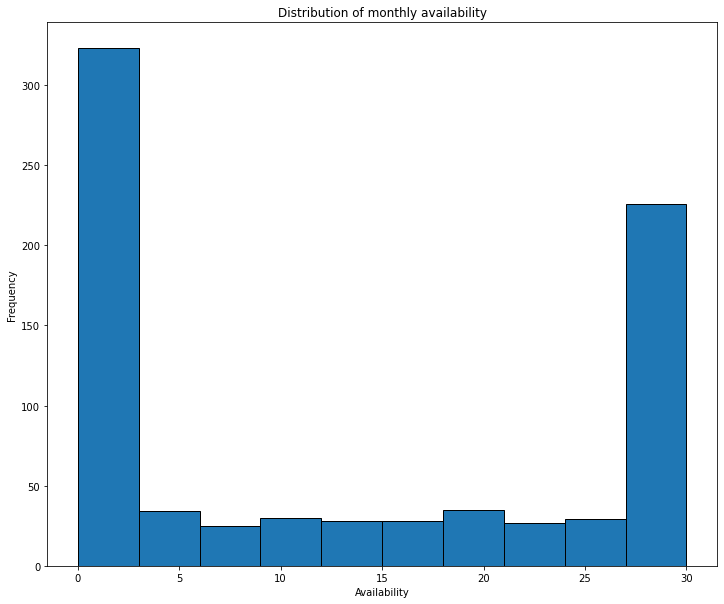

In [6]:
# Plot price
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
model['availability'].plot(kind = 'hist', bins = 10, edgecolor = 'black')
plt.xlabel('Availability')
plt.title('Distribution of monthly availability')

In [7]:
# PRE PROCESSING
X = model.drop(['availability'],axis = 1)
y = model['availability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MSE: 107.28213460390425
RMSE: 10.3577089457034
RRMSE: 0.8473707069366985
MAE: 8.677439786466183
RMAE: 0.7099068263844842
EV: 0.32787310624469257
R2: 0.32421615769569667


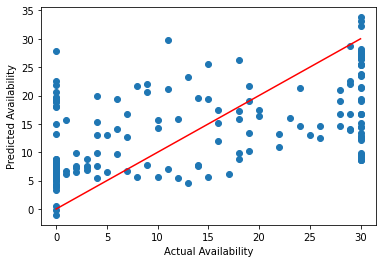

In [8]:
# REGRESSION MODELING #
lm = LinearRegression()
lm.fit(X_train,y_train)

# PREDICTIONS
plm = lm.predict(X_test)
plt.scatter(y_test,plm)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Availability')
plt.ylabel('Predicted Availability')

# EVALUATE THE MODEL
print("MSE:",metrics.mean_squared_error (y_test,plm))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,plm)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,plm))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, plm))
print("RMAE:", metrics.mean_absolute_error (y_test, plm)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,plm))
print("R2:", metrics.r2_score(y_test,plm))

MSE: 73.24278475980918
RMSE: 8.55819985509857
RRMSE: 0.700151732331569
MAE: 6.2243504773990805
RMAE: 0.5092180415480144
EV: 0.5453278215406646
R2: 0.5386343617341705


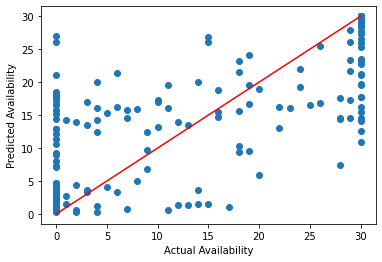

In [9]:
# RANDOM FOREST #
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
rf.fit(X_train,y_train)
p2 = rf.predict(X_test)

# PREDICTIONS
plt.scatter(y_test,p2)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Availability')
plt.ylabel('Predicted Availability')

# EVALUATE THE MODEL RFR1
print("MSE:",metrics.mean_squared_error (y_test,p2))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,p2)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,p2))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, p2))
print("RMAE:", metrics.mean_absolute_error (y_test, p2)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,p2))
print("R2:", metrics.r2_score(y_test,p2))

Epoch 1/1000
19/19 [==============================] - 1s 12ms/step - loss: 326.9794 - val_loss: 284.0197
Epoch 2/1000
19/19 [==============================] - 0s 4ms/step - loss: 295.0405 - val_loss: 253.5492
Epoch 3/1000
19/19 [==============================] - 0s 6ms/step - loss: 263.0380 - val_loss: 217.0408
Epoch 4/1000
19/19 [==============================] - 0s 7ms/step - loss: 224.2957 - val_loss: 176.8947
Epoch 5/1000
19/19 [==============================] - 0s 5ms/step - loss: 183.1624 - val_loss: 144.4090
Epoch 6/1000
19/19 [==============================] - 0s 6ms/step - loss: 154.5112 - val_loss: 125.6674
Epoch 7/1000
19/19 [==============================] - 0s 4ms/step - loss: 141.9845 - val_loss: 118.7232
Epoch 8/1000
19/19 [==============================] - 0s 5ms/step - loss: 132.6841 - val_loss: 116.5341
Epoch 9/1000
19/19 [==============================] - 0s 4ms/step - loss: 131.0319 - val_loss: 114.8397
Epoch 10/1000
19/19 [==============================] - 0s 6ms/s

<AxesSubplot:>

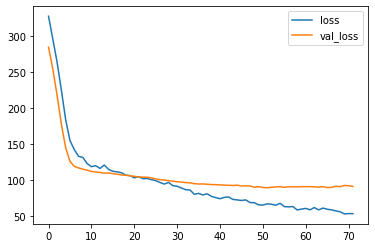

In [10]:
# DEEP LEARNING #
# Creating Model: dm1
dm1 = Sequential()
dm1.add(Dense(40,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(20,activation = 'relu'))
dm1.add(Dropout(.10))
dm1.add(Dense(1, activation = 'linear'))

dm1.compile(optimizer = 'adam', loss = 'mse', )
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20,
        restore_best_weights=True)
# Training DM1
dm1.fit(x = X_train, y = y_train, epochs = 1000,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 32)
# MODEL OVERFIT? DM1
pd.DataFrame(dm1.history.history).plot()

7/7 [==============================] - 0s 3ms/step
MSE: 89.05929599869029
RMSE: 9.43712329042544
RRMSE: 0.7720570133778287
MAE: 7.671371275398331
RMAE: 0.6275997264341658
EV: 0.44169386197167315
R2: 0.43900414113571407


Text(0, 0.5, 'Predicted Rate')

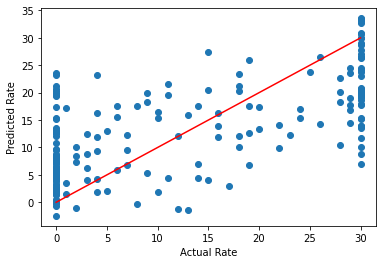

In [11]:
# MODEL EVALUATION DM1
pdm1 = dm1.predict(X_test)

print("MSE:",metrics.mean_squared_error (y_test,pdm1))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,pdm1)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,pdm1))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, pdm1))
print("RMAE:", metrics.mean_absolute_error (y_test, pdm1)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,pdm1))
print("R2:", metrics.r2_score(y_test,pdm1))

# PLOT THE PREDICTIONS DM1
plt.scatter(y_test,pdm1)
plt.plot(y_test,y_test,"r")
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# LSTM
model0 = Sequential()
model0.add(Dense(40,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(20,activation = 'relu'))
model0.add(Dropout(.10))
model0.add(Dense(1, activation = 'linear'))

cp0 = ModelCheckpoint('model1/', save_best_only = True)
model0.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=.0001), metrics = [RootMeanSquaredError()])
history = model0.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 1000, callbacks =[cp0])

Epoch 1/1000
19/19 [==============================] - 2s 90ms/step - loss: 335.1267 - root_mean_squared_error: 18.3065 - val_loss: 305.7671 - val_root_mean_squared_error: 17.4862
Epoch 2/1000
19/19 [==============================] - 1s 68ms/step - loss: 333.0971 - root_mean_squared_error: 18.2509 - val_loss: 303.3473 - val_root_mean_squared_error: 17.4169
Epoch 3/1000
19/19 [==============================] - 1s 65ms/step - loss: 330.8658 - root_mean_squared_error: 18.1897 - val_loss: 300.9547 - val_root_mean_squared_error: 17.3480
Epoch 4/1000
19/19 [==============================] - 1s 65ms/step - loss: 327.6807 - root_mean_squared_error: 18.1020 - val_loss: 298.5145 - val_root_mean_squared_error: 17.2776
Epoch 5/1000
19/19 [==============================] - 1s 66ms/step - loss: 323.9544 - root_mean_squared_error: 17.9987 - val_loss: 296.0206 - val_root_mean_squared_error: 17.2052
Epoch 6/1000
19/19 [==============================] - 1s 65ms/step - loss: 322.4007 - root_mean_squared_e

Epoch 26/1000
19/19 [==============================] - 2s 108ms/step - loss: 252.4238 - root_mean_squared_error: 15.8879 - val_loss: 224.9561 - val_root_mean_squared_error: 14.9985
Epoch 27/1000
19/19 [==============================] - 2s 89ms/step - loss: 246.3761 - root_mean_squared_error: 15.6964 - val_loss: 220.6832 - val_root_mean_squared_error: 14.8554
Epoch 28/1000
19/19 [==============================] - 1s 66ms/step - loss: 244.5105 - root_mean_squared_error: 15.6368 - val_loss: 216.4690 - val_root_mean_squared_error: 14.7129
Epoch 29/1000
19/19 [==============================] - 1s 55ms/step - loss: 238.5880 - root_mean_squared_error: 15.4463 - val_loss: 212.3171 - val_root_mean_squared_error: 14.5711
Epoch 30/1000
19/19 [==============================] - 1s 60ms/step - loss: 234.9003 - root_mean_squared_error: 15.3265 - val_loss: 208.1076 - val_root_mean_squared_error: 14.4259
Epoch 31/1000
19/19 [==============================] - 1s 59ms/step - loss: 228.6631 - root_mean_sq

Epoch 51/1000
19/19 [==============================] - 1s 61ms/step - loss: 165.5836 - root_mean_squared_error: 12.8679 - val_loss: 142.9281 - val_root_mean_squared_error: 11.9553
Epoch 52/1000
19/19 [==============================] - 1s 49ms/step - loss: 160.0928 - root_mean_squared_error: 12.6528 - val_loss: 141.2903 - val_root_mean_squared_error: 11.8866
Epoch 53/1000
19/19 [==============================] - 1s 69ms/step - loss: 156.3958 - root_mean_squared_error: 12.5058 - val_loss: 139.6470 - val_root_mean_squared_error: 11.8172
Epoch 54/1000
19/19 [==============================] - 1s 51ms/step - loss: 159.4070 - root_mean_squared_error: 12.6257 - val_loss: 138.2485 - val_root_mean_squared_error: 11.7579
Epoch 55/1000
19/19 [==============================] - 1s 59ms/step - loss: 153.3274 - root_mean_squared_error: 12.3825 - val_loss: 136.8710 - val_root_mean_squared_error: 11.6992
Epoch 56/1000
19/19 [==============================] - 1s 65ms/step - loss: 150.9540 - root_mean_squ

Epoch 76/1000
19/19 [==============================] - 1s 50ms/step - loss: 133.8787 - root_mean_squared_error: 11.5706 - val_loss: 125.1004 - val_root_mean_squared_error: 11.1848
Epoch 77/1000
19/19 [==============================] - 1s 56ms/step - loss: 132.8622 - root_mean_squared_error: 11.5266 - val_loss: 124.8562 - val_root_mean_squared_error: 11.1739
Epoch 78/1000
19/19 [==============================] - 1s 50ms/step - loss: 132.0533 - root_mean_squared_error: 11.4914 - val_loss: 124.6337 - val_root_mean_squared_error: 11.1639
Epoch 79/1000
19/19 [==============================] - 1s 55ms/step - loss: 130.1179 - root_mean_squared_error: 11.4069 - val_loss: 124.4173 - val_root_mean_squared_error: 11.1542
Epoch 80/1000
19/19 [==============================] - 1s 52ms/step - loss: 127.3211 - root_mean_squared_error: 11.2837 - val_loss: 124.1991 - val_root_mean_squared_error: 11.1445
Epoch 81/1000
19/19 [==============================] - 1s 61ms/step - loss: 128.6494 - root_mean_squ

Epoch 101/1000
19/19 [==============================] - 1s 57ms/step - loss: 123.1006 - root_mean_squared_error: 11.0951 - val_loss: 120.7770 - val_root_mean_squared_error: 10.9899
Epoch 102/1000
19/19 [==============================] - 1s 53ms/step - loss: 118.5291 - root_mean_squared_error: 10.8871 - val_loss: 120.6905 - val_root_mean_squared_error: 10.9859
Epoch 103/1000
19/19 [==============================] - 1s 56ms/step - loss: 121.4726 - root_mean_squared_error: 11.0215 - val_loss: 120.5418 - val_root_mean_squared_error: 10.9792
Epoch 104/1000
19/19 [==============================] - 1s 52ms/step - loss: 121.4753 - root_mean_squared_error: 11.0216 - val_loss: 120.4703 - val_root_mean_squared_error: 10.9759
Epoch 105/1000
19/19 [==============================] - 1s 59ms/step - loss: 122.5372 - root_mean_squared_error: 11.0697 - val_loss: 120.3364 - val_root_mean_squared_error: 10.9698
Epoch 106/1000
19/19 [==============================] - 1s 45ms/step - loss: 124.0694 - root_me

19/19 [==============================] - 1s 54ms/step - loss: 118.6623 - root_mean_squared_error: 10.8932 - val_loss: 118.3041 - val_root_mean_squared_error: 10.8768
Epoch 127/1000
19/19 [==============================] - 1s 49ms/step - loss: 117.7932 - root_mean_squared_error: 10.8533 - val_loss: 118.2763 - val_root_mean_squared_error: 10.8755
Epoch 128/1000
19/19 [==============================] - 1s 54ms/step - loss: 119.8473 - root_mean_squared_error: 10.9475 - val_loss: 118.1708 - val_root_mean_squared_error: 10.8706
Epoch 129/1000
19/19 [==============================] - 1s 69ms/step - loss: 114.2188 - root_mean_squared_error: 10.6873 - val_loss: 118.0975 - val_root_mean_squared_error: 10.8673
Epoch 130/1000
19/19 [==============================] - 1s 53ms/step - loss: 114.5515 - root_mean_squared_error: 10.7029 - val_loss: 118.0016 - val_root_mean_squared_error: 10.8629
Epoch 131/1000
19/19 [==============================] - 1s 47ms/step - loss: 112.0012 - root_mean_squared_erro

Epoch 153/1000
19/19 [==============================] - 1s 60ms/step - loss: 114.3169 - root_mean_squared_error: 10.6919 - val_loss: 116.5463 - val_root_mean_squared_error: 10.7957
Epoch 154/1000
19/19 [==============================] - 1s 60ms/step - loss: 113.8999 - root_mean_squared_error: 10.6724 - val_loss: 116.5208 - val_root_mean_squared_error: 10.7945
Epoch 155/1000
19/19 [==============================] - 1s 51ms/step - loss: 112.8527 - root_mean_squared_error: 10.6232 - val_loss: 116.3809 - val_root_mean_squared_error: 10.7880
Epoch 156/1000
19/19 [==============================] - 1s 62ms/step - loss: 111.7459 - root_mean_squared_error: 10.5710 - val_loss: 116.3438 - val_root_mean_squared_error: 10.7863
Epoch 157/1000
19/19 [==============================] - 0s 4ms/step - loss: 108.9069 - root_mean_squared_error: 10.4358 - val_loss: 116.3761 - val_root_mean_squared_error: 10.7878
Epoch 158/1000
19/19 [==============================] - 1s 49ms/step - loss: 109.6560 - root_mea

19/19 [==============================] - 1s 70ms/step - loss: 110.0832 - root_mean_squared_error: 10.4921 - val_loss: 114.6884 - val_root_mean_squared_error: 10.7093
Epoch 179/1000
19/19 [==============================] - 1s 59ms/step - loss: 107.5551 - root_mean_squared_error: 10.3709 - val_loss: 114.5700 - val_root_mean_squared_error: 10.7037
Epoch 180/1000
19/19 [==============================] - 1s 60ms/step - loss: 109.8962 - root_mean_squared_error: 10.4831 - val_loss: 114.5531 - val_root_mean_squared_error: 10.7029
Epoch 181/1000
19/19 [==============================] - 1s 59ms/step - loss: 106.8089 - root_mean_squared_error: 10.3348 - val_loss: 114.5484 - val_root_mean_squared_error: 10.7027
Epoch 182/1000
19/19 [==============================] - 1s 66ms/step - loss: 108.4367 - root_mean_squared_error: 10.4133 - val_loss: 114.5477 - val_root_mean_squared_error: 10.7027
Epoch 183/1000
19/19 [==============================] - 0s 5ms/step - loss: 105.7740 - root_mean_squared_error

19/19 [==============================] - 1s 73ms/step - loss: 107.4852 - root_mean_squared_error: 10.3675 - val_loss: 113.1937 - val_root_mean_squared_error: 10.6393
Epoch 208/1000
19/19 [==============================] - 1s 64ms/step - loss: 103.3652 - root_mean_squared_error: 10.1669 - val_loss: 113.1541 - val_root_mean_squared_error: 10.6374
Epoch 209/1000
19/19 [==============================] - 1s 66ms/step - loss: 102.1961 - root_mean_squared_error: 10.1092 - val_loss: 113.1536 - val_root_mean_squared_error: 10.6374
Epoch 210/1000
19/19 [==============================] - 1s 75ms/step - loss: 103.8452 - root_mean_squared_error: 10.1904 - val_loss: 113.0645 - val_root_mean_squared_error: 10.6332
Epoch 211/1000
19/19 [==============================] - 1s 56ms/step - loss: 107.6709 - root_mean_squared_error: 10.3765 - val_loss: 112.9781 - val_root_mean_squared_error: 10.6291
Epoch 212/1000
19/19 [==============================] - 1s 68ms/step - loss: 103.8621 - root_mean_squared_erro

Epoch 233/1000
19/19 [==============================] - 1s 55ms/step - loss: 98.0496 - root_mean_squared_error: 9.9020 - val_loss: 111.3745 - val_root_mean_squared_error: 10.5534
Epoch 234/1000
19/19 [==============================] - 1s 55ms/step - loss: 99.0174 - root_mean_squared_error: 9.9508 - val_loss: 111.3112 - val_root_mean_squared_error: 10.5504
Epoch 235/1000
19/19 [==============================] - 1s 53ms/step - loss: 97.9554 - root_mean_squared_error: 9.8972 - val_loss: 111.2693 - val_root_mean_squared_error: 10.5484
Epoch 236/1000
19/19 [==============================] - 1s 52ms/step - loss: 102.6262 - root_mean_squared_error: 10.1305 - val_loss: 111.1455 - val_root_mean_squared_error: 10.5426
Epoch 237/1000
19/19 [==============================] - 1s 59ms/step - loss: 102.3697 - root_mean_squared_error: 10.1178 - val_loss: 111.0482 - val_root_mean_squared_error: 10.5379
Epoch 238/1000
19/19 [==============================] - 2s 84ms/step - loss: 102.0181 - root_mean_squ

19/19 [==============================] - 1s 62ms/step - loss: 93.4975 - root_mean_squared_error: 9.6694 - val_loss: 109.7148 - val_root_mean_squared_error: 10.4745
Epoch 263/1000
19/19 [==============================] - 1s 48ms/step - loss: 94.5714 - root_mean_squared_error: 9.7248 - val_loss: 109.6072 - val_root_mean_squared_error: 10.4693
Epoch 264/1000
19/19 [==============================] - 1s 53ms/step - loss: 98.2921 - root_mean_squared_error: 9.9142 - val_loss: 109.5714 - val_root_mean_squared_error: 10.4676
Epoch 265/1000
19/19 [==============================] - 1s 48ms/step - loss: 92.9199 - root_mean_squared_error: 9.6395 - val_loss: 109.4775 - val_root_mean_squared_error: 10.4632
Epoch 266/1000
19/19 [==============================] - 1s 49ms/step - loss: 93.1023 - root_mean_squared_error: 9.6490 - val_loss: 109.4499 - val_root_mean_squared_error: 10.4618
Epoch 267/1000
19/19 [==============================] - 1s 46ms/step - loss: 89.4253 - root_mean_squared_error: 9.4565 -

19/19 [==============================] - 0s 7ms/step - loss: 89.8850 - root_mean_squared_error: 9.4808 - val_loss: 108.2321 - val_root_mean_squared_error: 10.4035
Epoch 289/1000
19/19 [==============================] - 1s 51ms/step - loss: 87.7361 - root_mean_squared_error: 9.3668 - val_loss: 108.1278 - val_root_mean_squared_error: 10.3985
Epoch 290/1000
19/19 [==============================] - 1s 57ms/step - loss: 90.0474 - root_mean_squared_error: 9.4893 - val_loss: 108.0638 - val_root_mean_squared_error: 10.3954
Epoch 291/1000
19/19 [==============================] - 1s 58ms/step - loss: 89.9036 - root_mean_squared_error: 9.4818 - val_loss: 107.8994 - val_root_mean_squared_error: 10.3875
Epoch 292/1000
19/19 [==============================] - 0s 6ms/step - loss: 88.1709 - root_mean_squared_error: 9.3899 - val_loss: 107.9578 - val_root_mean_squared_error: 10.3903
Epoch 293/1000
19/19 [==============================] - 1s 53ms/step - loss: 91.2109 - root_mean_squared_error: 9.5504 - v

Epoch 319/1000
19/19 [==============================] - 1s 63ms/step - loss: 83.1648 - root_mean_squared_error: 9.1195 - val_loss: 106.7120 - val_root_mean_squared_error: 10.3302
Epoch 320/1000
19/19 [==============================] - 1s 54ms/step - loss: 82.6218 - root_mean_squared_error: 9.0897 - val_loss: 106.6577 - val_root_mean_squared_error: 10.3275
Epoch 321/1000
19/19 [==============================] - 0s 5ms/step - loss: 86.4292 - root_mean_squared_error: 9.2967 - val_loss: 106.6994 - val_root_mean_squared_error: 10.3295
Epoch 322/1000
19/19 [==============================] - 1s 45ms/step - loss: 84.4609 - root_mean_squared_error: 9.1903 - val_loss: 106.6133 - val_root_mean_squared_error: 10.3254
Epoch 323/1000
19/19 [==============================] - 1s 43ms/step - loss: 86.9096 - root_mean_squared_error: 9.3225 - val_loss: 106.5904 - val_root_mean_squared_error: 10.3243
Epoch 324/1000
19/19 [==============================] - 1s 58ms/step - loss: 86.4609 - root_mean_squared_e

19/19 [==============================] - 0s 5ms/step - loss: 85.4462 - root_mean_squared_error: 9.2437 - val_loss: 105.4760 - val_root_mean_squared_error: 10.2702
Epoch 349/1000
19/19 [==============================] - 1s 66ms/step - loss: 81.2622 - root_mean_squared_error: 9.0146 - val_loss: 105.3340 - val_root_mean_squared_error: 10.2632
Epoch 350/1000
19/19 [==============================] - 1s 53ms/step - loss: 81.7584 - root_mean_squared_error: 9.0420 - val_loss: 105.2920 - val_root_mean_squared_error: 10.2612
Epoch 351/1000
19/19 [==============================] - 0s 4ms/step - loss: 79.1279 - root_mean_squared_error: 8.8954 - val_loss: 105.3200 - val_root_mean_squared_error: 10.2626
Epoch 352/1000
19/19 [==============================] - 1s 50ms/step - loss: 81.6410 - root_mean_squared_error: 9.0355 - val_loss: 105.2810 - val_root_mean_squared_error: 10.2607
Epoch 353/1000
19/19 [==============================] - 0s 6ms/step - loss: 85.6570 - root_mean_squared_error: 9.2551 - va

Epoch 383/1000
19/19 [==============================] - 0s 7ms/step - loss: 75.0322 - root_mean_squared_error: 8.6621 - val_loss: 104.7488 - val_root_mean_squared_error: 10.2347
Epoch 384/1000
19/19 [==============================] - 1s 57ms/step - loss: 75.8836 - root_mean_squared_error: 8.7111 - val_loss: 104.6362 - val_root_mean_squared_error: 10.2292
Epoch 385/1000
19/19 [==============================] - 0s 4ms/step - loss: 74.3903 - root_mean_squared_error: 8.6250 - val_loss: 104.6911 - val_root_mean_squared_error: 10.2319
Epoch 386/1000
19/19 [==============================] - 0s 4ms/step - loss: 76.7270 - root_mean_squared_error: 8.7594 - val_loss: 104.7363 - val_root_mean_squared_error: 10.2341
Epoch 387/1000
19/19 [==============================] - 0s 5ms/step - loss: 76.4867 - root_mean_squared_error: 8.7457 - val_loss: 104.7528 - val_root_mean_squared_error: 10.2349
Epoch 388/1000
19/19 [==============================] - 0s 7ms/step - loss: 75.7405 - root_mean_squared_error

Epoch 421/1000
19/19 [==============================] - 0s 7ms/step - loss: 69.4111 - root_mean_squared_error: 8.3313 - val_loss: 104.0930 - val_root_mean_squared_error: 10.2026
Epoch 422/1000
19/19 [==============================] - 0s 5ms/step - loss: 74.4535 - root_mean_squared_error: 8.6286 - val_loss: 104.0826 - val_root_mean_squared_error: 10.2021
Epoch 423/1000
19/19 [==============================] - 0s 7ms/step - loss: 73.9529 - root_mean_squared_error: 8.5996 - val_loss: 104.0939 - val_root_mean_squared_error: 10.2026
Epoch 424/1000
19/19 [==============================] - 0s 7ms/step - loss: 70.9128 - root_mean_squared_error: 8.4210 - val_loss: 104.2281 - val_root_mean_squared_error: 10.2092
Epoch 425/1000
19/19 [==============================] - 0s 5ms/step - loss: 75.2436 - root_mean_squared_error: 8.6743 - val_loss: 104.1574 - val_root_mean_squared_error: 10.2058
Epoch 426/1000
19/19 [==============================] - 0s 4ms/step - loss: 70.8828 - root_mean_squared_error:

19/19 [==============================] - 1s 65ms/step - loss: 67.8543 - root_mean_squared_error: 8.2374 - val_loss: 103.8927 - val_root_mean_squared_error: 10.1928
Epoch 465/1000
19/19 [==============================] - 0s 6ms/step - loss: 67.7466 - root_mean_squared_error: 8.2308 - val_loss: 103.9063 - val_root_mean_squared_error: 10.1934
Epoch 466/1000
19/19 [==============================] - 0s 5ms/step - loss: 70.6188 - root_mean_squared_error: 8.4035 - val_loss: 103.9279 - val_root_mean_squared_error: 10.1945
Epoch 467/1000
19/19 [==============================] - 0s 5ms/step - loss: 70.3385 - root_mean_squared_error: 8.3868 - val_loss: 104.0394 - val_root_mean_squared_error: 10.2000
Epoch 468/1000
19/19 [==============================] - 0s 6ms/step - loss: 69.3449 - root_mean_squared_error: 8.3274 - val_loss: 104.0647 - val_root_mean_squared_error: 10.2012
Epoch 469/1000
19/19 [==============================] - 0s 7ms/step - loss: 69.5517 - root_mean_squared_error: 8.3398 - val_

19/19 [==============================] - 0s 7ms/step - loss: 66.5424 - root_mean_squared_error: 8.1574 - val_loss: 104.0294 - val_root_mean_squared_error: 10.1995
Epoch 510/1000
19/19 [==============================] - 0s 5ms/step - loss: 66.1558 - root_mean_squared_error: 8.1336 - val_loss: 104.0835 - val_root_mean_squared_error: 10.2021
Epoch 511/1000
19/19 [==============================] - 0s 4ms/step - loss: 63.4907 - root_mean_squared_error: 7.9681 - val_loss: 104.0461 - val_root_mean_squared_error: 10.2003
Epoch 512/1000
19/19 [==============================] - 0s 4ms/step - loss: 65.7920 - root_mean_squared_error: 8.1112 - val_loss: 103.9631 - val_root_mean_squared_error: 10.1962
Epoch 513/1000
19/19 [==============================] - 1s 64ms/step - loss: 63.7454 - root_mean_squared_error: 7.9841 - val_loss: 103.8274 - val_root_mean_squared_error: 10.1896
Epoch 514/1000
19/19 [==============================] - 0s 5ms/step - loss: 62.3491 - root_mean_squared_error: 7.8961 - val_

19/19 [==============================] - 0s 5ms/step - loss: 62.0711 - root_mean_squared_error: 7.8785 - val_loss: 104.1158 - val_root_mean_squared_error: 10.2037
Epoch 554/1000
19/19 [==============================] - 0s 4ms/step - loss: 62.4028 - root_mean_squared_error: 7.8995 - val_loss: 104.2166 - val_root_mean_squared_error: 10.2087
Epoch 555/1000
19/19 [==============================] - 0s 5ms/step - loss: 63.3420 - root_mean_squared_error: 7.9588 - val_loss: 104.1663 - val_root_mean_squared_error: 10.2062
Epoch 556/1000
19/19 [==============================] - 0s 5ms/step - loss: 62.6798 - root_mean_squared_error: 7.9171 - val_loss: 104.1144 - val_root_mean_squared_error: 10.2036
Epoch 557/1000
19/19 [==============================] - 0s 7ms/step - loss: 61.5119 - root_mean_squared_error: 7.8429 - val_loss: 104.0478 - val_root_mean_squared_error: 10.2004
Epoch 558/1000
19/19 [==============================] - 0s 6ms/step - loss: 59.0536 - root_mean_squared_error: 7.6846 - val_l

Epoch 595/1000
19/19 [==============================] - 1s 65ms/step - loss: 59.3977 - root_mean_squared_error: 7.7070 - val_loss: 103.5586 - val_root_mean_squared_error: 10.1764
Epoch 596/1000
19/19 [==============================] - 0s 6ms/step - loss: 59.6315 - root_mean_squared_error: 7.7221 - val_loss: 103.6341 - val_root_mean_squared_error: 10.1801
Epoch 597/1000
19/19 [==============================] - 0s 6ms/step - loss: 59.2203 - root_mean_squared_error: 7.6955 - val_loss: 103.7139 - val_root_mean_squared_error: 10.1840
Epoch 598/1000
19/19 [==============================] - 0s 5ms/step - loss: 60.4246 - root_mean_squared_error: 7.7733 - val_loss: 103.6998 - val_root_mean_squared_error: 10.1833
Epoch 599/1000
19/19 [==============================] - 0s 4ms/step - loss: 59.1517 - root_mean_squared_error: 7.6910 - val_loss: 103.6503 - val_root_mean_squared_error: 10.1809
Epoch 600/1000
19/19 [==============================] - 0s 4ms/step - loss: 61.9788 - root_mean_squared_error

19/19 [==============================] - 0s 4ms/step - loss: 60.7225 - root_mean_squared_error: 7.7925 - val_loss: 104.2834 - val_root_mean_squared_error: 10.2119
Epoch 641/1000
19/19 [==============================] - 0s 4ms/step - loss: 58.8951 - root_mean_squared_error: 7.6743 - val_loss: 104.2493 - val_root_mean_squared_error: 10.2103
Epoch 642/1000
19/19 [==============================] - 0s 4ms/step - loss: 56.8522 - root_mean_squared_error: 7.5400 - val_loss: 104.3115 - val_root_mean_squared_error: 10.2133
Epoch 643/1000
19/19 [==============================] - 0s 4ms/step - loss: 57.5923 - root_mean_squared_error: 7.5890 - val_loss: 104.3406 - val_root_mean_squared_error: 10.2147
Epoch 644/1000
19/19 [==============================] - 0s 4ms/step - loss: 58.2076 - root_mean_squared_error: 7.6294 - val_loss: 104.3933 - val_root_mean_squared_error: 10.2173
Epoch 645/1000
19/19 [==============================] - 0s 5ms/step - loss: 58.1225 - root_mean_squared_error: 7.6238 - val_l

19/19 [==============================] - 0s 4ms/step - loss: 52.9718 - root_mean_squared_error: 7.2782 - val_loss: 105.0261 - val_root_mean_squared_error: 10.2482
Epoch 687/1000
19/19 [==============================] - 0s 4ms/step - loss: 56.5525 - root_mean_squared_error: 7.5201 - val_loss: 105.0383 - val_root_mean_squared_error: 10.2488
Epoch 688/1000
19/19 [==============================] - 0s 5ms/step - loss: 54.9300 - root_mean_squared_error: 7.4115 - val_loss: 105.0657 - val_root_mean_squared_error: 10.2502
Epoch 689/1000
19/19 [==============================] - 0s 5ms/step - loss: 55.8371 - root_mean_squared_error: 7.4724 - val_loss: 105.0433 - val_root_mean_squared_error: 10.2491
Epoch 690/1000
19/19 [==============================] - 0s 4ms/step - loss: 57.7473 - root_mean_squared_error: 7.5992 - val_loss: 105.0147 - val_root_mean_squared_error: 10.2477
Epoch 691/1000
19/19 [==============================] - 0s 5ms/step - loss: 54.8837 - root_mean_squared_error: 7.4084 - val_l

19/19 [==============================] - 0s 4ms/step - loss: 52.2684 - root_mean_squared_error: 7.2297 - val_loss: 104.7807 - val_root_mean_squared_error: 10.2362
Epoch 733/1000
19/19 [==============================] - 0s 5ms/step - loss: 56.2155 - root_mean_squared_error: 7.4977 - val_loss: 104.8360 - val_root_mean_squared_error: 10.2389
Epoch 734/1000
19/19 [==============================] - 0s 8ms/step - loss: 54.0257 - root_mean_squared_error: 7.3502 - val_loss: 104.8809 - val_root_mean_squared_error: 10.2411
Epoch 735/1000
19/19 [==============================] - 0s 4ms/step - loss: 52.8594 - root_mean_squared_error: 7.2704 - val_loss: 104.8152 - val_root_mean_squared_error: 10.2379
Epoch 736/1000
19/19 [==============================] - 0s 5ms/step - loss: 55.2500 - root_mean_squared_error: 7.4330 - val_loss: 104.7514 - val_root_mean_squared_error: 10.2348
Epoch 737/1000
19/19 [==============================] - 0s 4ms/step - loss: 54.4531 - root_mean_squared_error: 7.3792 - val_l

19/19 [==============================] - 0s 4ms/step - loss: 50.8855 - root_mean_squared_error: 7.1334 - val_loss: 105.4433 - val_root_mean_squared_error: 10.2686
Epoch 779/1000
19/19 [==============================] - 0s 5ms/step - loss: 52.6695 - root_mean_squared_error: 7.2574 - val_loss: 105.3576 - val_root_mean_squared_error: 10.2644
Epoch 780/1000
19/19 [==============================] - 0s 5ms/step - loss: 52.3949 - root_mean_squared_error: 7.2384 - val_loss: 105.0475 - val_root_mean_squared_error: 10.2493
Epoch 781/1000
19/19 [==============================] - 0s 4ms/step - loss: 53.8981 - root_mean_squared_error: 7.3415 - val_loss: 105.0966 - val_root_mean_squared_error: 10.2517
Epoch 782/1000
19/19 [==============================] - 0s 5ms/step - loss: 53.3574 - root_mean_squared_error: 7.3046 - val_loss: 105.2147 - val_root_mean_squared_error: 10.2574
Epoch 783/1000
19/19 [==============================] - 0s 8ms/step - loss: 51.0104 - root_mean_squared_error: 7.1422 - val_l

19/19 [==============================] - 0s 4ms/step - loss: 52.0676 - root_mean_squared_error: 7.2158 - val_loss: 104.7328 - val_root_mean_squared_error: 10.2339
Epoch 825/1000
19/19 [==============================] - 0s 4ms/step - loss: 51.4651 - root_mean_squared_error: 7.1739 - val_loss: 104.7607 - val_root_mean_squared_error: 10.2353
Epoch 826/1000
19/19 [==============================] - 0s 4ms/step - loss: 48.8757 - root_mean_squared_error: 6.9911 - val_loss: 104.8043 - val_root_mean_squared_error: 10.2374
Epoch 827/1000
19/19 [==============================] - 0s 4ms/step - loss: 51.9305 - root_mean_squared_error: 7.2063 - val_loss: 104.7063 - val_root_mean_squared_error: 10.2326
Epoch 828/1000
19/19 [==============================] - 0s 4ms/step - loss: 47.3497 - root_mean_squared_error: 6.8811 - val_loss: 104.5226 - val_root_mean_squared_error: 10.2236
Epoch 829/1000
19/19 [==============================] - 0s 4ms/step - loss: 49.9364 - root_mean_squared_error: 7.0666 - val_l

19/19 [==============================] - 0s 5ms/step - loss: 54.3904 - root_mean_squared_error: 7.3750 - val_loss: 104.2782 - val_root_mean_squared_error: 10.2117
Epoch 871/1000
19/19 [==============================] - 0s 5ms/step - loss: 49.7981 - root_mean_squared_error: 7.0568 - val_loss: 104.2730 - val_root_mean_squared_error: 10.2114
Epoch 872/1000
19/19 [==============================] - 0s 4ms/step - loss: 51.2077 - root_mean_squared_error: 7.1560 - val_loss: 104.4174 - val_root_mean_squared_error: 10.2185
Epoch 873/1000
19/19 [==============================] - 0s 4ms/step - loss: 49.4734 - root_mean_squared_error: 7.0337 - val_loss: 104.4199 - val_root_mean_squared_error: 10.2186
Epoch 874/1000
19/19 [==============================] - 0s 4ms/step - loss: 51.7850 - root_mean_squared_error: 7.1962 - val_loss: 104.3468 - val_root_mean_squared_error: 10.2150
Epoch 875/1000
19/19 [==============================] - 0s 4ms/step - loss: 47.9898 - root_mean_squared_error: 6.9275 - val_l

19/19 [==============================] - 0s 7ms/step - loss: 47.7532 - root_mean_squared_error: 6.9104 - val_loss: 104.6779 - val_root_mean_squared_error: 10.2312
Epoch 917/1000
19/19 [==============================] - 0s 4ms/step - loss: 50.4870 - root_mean_squared_error: 7.1054 - val_loss: 104.8440 - val_root_mean_squared_error: 10.2393
Epoch 918/1000
19/19 [==============================] - 0s 4ms/step - loss: 47.0935 - root_mean_squared_error: 6.8625 - val_loss: 104.9804 - val_root_mean_squared_error: 10.2460
Epoch 919/1000
19/19 [==============================] - 0s 4ms/step - loss: 46.7374 - root_mean_squared_error: 6.8365 - val_loss: 105.1783 - val_root_mean_squared_error: 10.2556
Epoch 920/1000
19/19 [==============================] - 0s 6ms/step - loss: 45.6986 - root_mean_squared_error: 6.7601 - val_loss: 105.2462 - val_root_mean_squared_error: 10.2590
Epoch 921/1000
19/19 [==============================] - 0s 5ms/step - loss: 46.7048 - root_mean_squared_error: 6.8341 - val_l

19/19 [==============================] - 0s 5ms/step - loss: 47.1614 - root_mean_squared_error: 6.8674 - val_loss: 105.2338 - val_root_mean_squared_error: 10.2584
Epoch 963/1000
19/19 [==============================] - 0s 6ms/step - loss: 47.2024 - root_mean_squared_error: 6.8704 - val_loss: 105.2065 - val_root_mean_squared_error: 10.2570
Epoch 964/1000
19/19 [==============================] - 0s 5ms/step - loss: 47.9327 - root_mean_squared_error: 6.9233 - val_loss: 105.2775 - val_root_mean_squared_error: 10.2605
Epoch 965/1000
19/19 [==============================] - 0s 4ms/step - loss: 48.6319 - root_mean_squared_error: 6.9737 - val_loss: 105.3131 - val_root_mean_squared_error: 10.2622
Epoch 966/1000
19/19 [==============================] - 0s 4ms/step - loss: 51.2166 - root_mean_squared_error: 7.1566 - val_loss: 105.3745 - val_root_mean_squared_error: 10.2652
Epoch 967/1000
19/19 [==============================] - 0s 5ms/step - loss: 47.0948 - root_mean_squared_error: 6.8626 - val_l

7/7 [==============================] - 0s 1ms/step


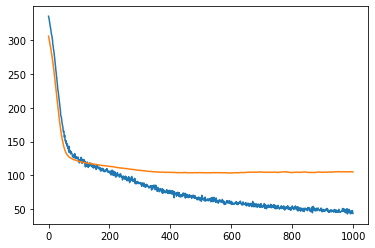

In [13]:
from tensorflow.keras.models import load_model
model0 = load_model('model1/')

test_predictions = model0.predict(X_test).flatten()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [14]:
# Evaluating 
print("MSE:",metrics.mean_squared_error (y_test,test_predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,test_predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,test_predictions))/y_test.mean())
print("MAE:", metrics.mean_absolute_error (y_test, test_predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, test_predictions)/y_test.mean())
print("EV:", metrics.explained_variance_score(y_test,test_predictions))
print("R2:", metrics.r2_score(y_test,test_predictions))

MSE: 103.55856944284157
RMSE: 10.176373098645783
RRMSE: 0.8325355068244266
MAE: 8.050333784618958
RMAE: 0.6586028885257205
EV: 0.349064614705094
R2: 0.3476713693290584
